In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from patsy import dmatrices
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [13]:
%matplotlib inline

In [14]:
data=pd.read_json('train.json')

In [15]:
data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [16]:
levels=['interest_level','bedrooms','bathrooms','price','display_address','features','photos','manager_id','description','latitude','longitude','created']

In [17]:
level1=data[levels]

In [18]:
level1.head(5)

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10,medium,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24
10000,low,2,1.0,5465,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",[https://photos.renthop.com/2/7150865_be3306c5...,7533621a882f71e25173b27e3139d83d,,40.7947,-73.9667,2016-06-12 12:19:27
100004,high,1,1.0,2850,W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",[https://photos.renthop.com/2/6887163_de85c427...,d9039c43983f6e564b1482b273bd7b01,"Top Top West Village location, beautiful Pre-w...",40.7388,-74.0018,2016-04-17 03:26:41
100007,low,1,1.0,3275,East 49th Street,"[Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6888711_6e660cee...,1067e078446a7897d2da493d2f741316,Building Amenities - Garage - Garden - fitness...,40.7539,-73.9677,2016-04-18 02:22:02
100013,low,4,1.0,3350,West 143rd Street,[Pre-War],[https://photos.renthop.com/2/6934781_1fa4b41a...,98e13ad4b495b9613cef886d79a6291f,Beautifully renovated 3 bedroom flex 4 bedroom...,40.8241,-73.9493,2016-04-28 01:32:41


### We are going to convert the medium category variable to high category variable, so that we have only two categories ie Low and high

In [19]:
level2=level1[level1['interest_level']=='medium']
level2.shape[0]
level2.head()

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10,medium,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24
100014,medium,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47
100026,medium,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35
100051,medium,0,1.0,2350,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,Stunning full renovated studio unit. High cei...,40.7439,-73.9743,2016-04-18 02:36:00
100063,medium,2,1.0,2999,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,No fee huge two bedroom apartment. Great locat...,40.7427,-73.9794,2016-04-07 02:11:45


In [20]:
level2.interest_level='high'

C:\Anaconda\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [21]:
level2.head()

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10,high,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24
100014,high,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47
100026,high,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35
100051,high,0,1.0,2350,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,Stunning full renovated studio unit. High cei...,40.7439,-73.9743,2016-04-18 02:36:00
100063,high,2,1.0,2999,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,No fee huge two bedroom apartment. Great locat...,40.7427,-73.9794,2016-04-07 02:11:45


In [22]:
level3=level1.drop(level1[level1['interest_level']=='medium'].index)

In [23]:
level3.head()

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10000,low,2,1.0,5465,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",[https://photos.renthop.com/2/7150865_be3306c5...,7533621a882f71e25173b27e3139d83d,,40.7947,-73.9667,2016-06-12 12:19:27
100004,high,1,1.0,2850,W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",[https://photos.renthop.com/2/6887163_de85c427...,d9039c43983f6e564b1482b273bd7b01,"Top Top West Village location, beautiful Pre-w...",40.7388,-74.0018,2016-04-17 03:26:41
100007,low,1,1.0,3275,East 49th Street,"[Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6888711_6e660cee...,1067e078446a7897d2da493d2f741316,Building Amenities - Garage - Garden - fitness...,40.7539,-73.9677,2016-04-18 02:22:02
100013,low,4,1.0,3350,West 143rd Street,[Pre-War],[https://photos.renthop.com/2/6934781_1fa4b41a...,98e13ad4b495b9613cef886d79a6291f,Beautifully renovated 3 bedroom flex 4 bedroom...,40.8241,-73.9493,2016-04-28 01:32:41
100016,low,2,1.0,3600,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",[https://photos.renthop.com/2/6930771_7e3622b6...,01287194f20de51872e81f660def4784,Stunning unit with a great location and lots o...,40.8012,-73.9660,2016-04-27 03:19:56


In [24]:
level4= [level2,level3]

In [25]:
result = pd.concat(level4)

### This will be our final dataset

In [26]:
result.head()

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created
10,high,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24
100014,high,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47
100026,high,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35
100051,high,0,1.0,2350,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,Stunning full renovated studio unit. High cei...,40.7439,-73.9743,2016-04-18 02:36:00
100063,high,2,1.0,2999,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,No fee huge two bedroom apartment. Great locat...,40.7427,-73.9794,2016-04-07 02:11:45


In [27]:
target=result['interest_level'].value_counts()

In [28]:
target

low     34284
high    15068
Name: interest_level, dtype: int64

In [29]:
result['int_level'] = result['interest_level'].map({'high': 1, 'low': 0})

In [30]:
number=LabelEncoder()

### There are no null values in the data

In [31]:
result[result.isnull().any(axis=1)]

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created,int_level


In [32]:
result.dtypes

interest_level      object
bedrooms             int64
bathrooms          float64
price                int64
display_address     object
features            object
photos              object
manager_id          object
description         object
latitude           float64
longitude          float64
created             object
int_level            int64
dtype: object

In [33]:
resulta=result.copy()

In [34]:
#Cleaning the display_address column
resulta['display_address']=resulta.display_address.map(lambda x: " ".join(x.strip("-,.$*!#&\'\t").replace("'",'').lower()\
                                                                         .replace('street', 'st').replace('avenue', 'ave')\
                                                                         .replace('east', 'e').replace('west', 'w').split()))


In [35]:
#Converting display address into numerical value
resulta['display_address']=number.fit_transform(resulta['display_address'].astype('str'))

In [36]:
enc=OneHotEncoder()

In [37]:
enc.fit_transform(resulta['display_address'])

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


<1x49352 sparse matrix of type '<class 'numpy.float64'>'
	with 49352 stored elements in Compressed Sparse Row format>

In [38]:
resulta.head()

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,created,int_level
10,high,3,1.5,3000,4912,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,40.7145,-73.9425,2016-06-24 07:54:24,1
100014,high,4,2.0,7995,5771,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,,40.7429,-74.0028,2016-04-19 04:24:47,1
100026,high,1,1.0,1725,4621,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,<p><a website_redacted,40.8234,-73.9457,2016-04-20 02:36:35,1
100051,high,0,1.0,2350,3951,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,Stunning full renovated studio unit. High cei...,40.7439,-73.9743,2016-04-18 02:36:00,1
100063,high,2,1.0,2999,3932,"[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,No fee huge two bedroom apartment. Great locat...,40.7427,-73.9794,2016-04-07 02:11:45,1


In [39]:
#Determining the count of features
resulta['feat_count']=resulta['features'].apply(len)

In [40]:
#Determining the count of photos
resulta['photos']=resulta['photos'].apply(len)

In [41]:
#Determining number of words in description
resulta['description'] = resulta["description"].apply(lambda x: len(x.split(" ")))

In [42]:
resulta['created']=pd.to_datetime(resulta['created'])

In [43]:
resulta['created_year']=resulta['created'].dt.year

In [44]:
resulta['created_month']=resulta['created'].dt.month

In [45]:
resulta['created_day']=resulta['created'].dt.day

In [46]:
resulta=resulta.drop(["created"], axis=1)


In [47]:
len(resulta['created_day'].unique())

31

In [48]:
resulta.shape

(49352, 16)

In [49]:
#Finding number of unique manager id
len(resulta['manager_id'].unique())

3481

In [50]:
temp1 = result.groupby('manager_id').count().iloc[:,-1].sort_values(ascending=False)

In [51]:
manager_df=pd.DataFrame(temp1)

In [52]:
manager_df.columns=['train_counts']

In [53]:
manager_df

,train_counts
manager_id,
e6472c7237327dd3903b3d6f6a94515a,2533
6e5c10246156ae5bdcd9b487ca99d96a,711
8f5a9c893f6d602f4953fcc0b8e6e9b4,410
62b685cc0d876c3a1a51d63a0d6a8082,402
cb87dadbca78fad02b388dc9e8f25a5b,373
9df32cb8dda19d3222d66e69e258616b,330
b7de4cb395920136663132057fa89d84,320
2aa9bfa5f67ed9997ea341dee8a3a271,316
ad3d8ddc52c7e0859b5c6c7f7949c3bd,305


In [54]:
len(manager_df[manager_df['train_counts']==1])

969

In [55]:
ix20 = int(len(manager_df['train_counts'].dropna())*0.2)
print("TRAIN: 20% of managers ({0}) responsible for {1:2.2f}% of entries".format(ix20,manager_df['train_counts'].sort_values(ascending = False).cumsum().iloc[ix20]/manager_df['train_counts'].sum()*100))

TRAIN: 20% of managers (696) responsible for 76.16% of entries


In [56]:
resulta['manager_id']=number.fit_transform(resulta['manager_id'].astype('str'))

In [57]:
enc=OneHotEncoder()

In [58]:
enc.fit_transform(resulta['manager_id']).toarray()

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  1.,  1., ...,  1.,  1.,  1.]])

### The Features that we are using are:
    
Bedrooms:

Bathrooms

Price

Display_address

Number of Features

Number of photos

latitude

Longitude

Manager ID

Description

Created_day

Feature dummy variables

In [59]:
resulta.head(30)

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,longitude,int_level,feat_count,created_year,created_month,created_day
10,high,3,1.5,3000,4912,[],5,1239,95,40.7145,-73.9425,1,0,2016,6,24
100014,high,4,2.0,7995,5771,[],5,2443,9,40.7429,-74.0028,1,0,2016,4,19
100026,high,1,1.0,1725,4621,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",5,2653,4,40.8234,-73.9457,1,4,2016,4,20
100051,high,0,1.0,2350,3951,"[Doorman, Elevator, Fitness Center, Laundry in...",2,3003,70,40.7439,-73.9743,1,5,2016,4,18
100063,high,2,1.0,2999,3932,"[Elevator, Central A/C, Walk in Closet(s), Par...",5,3135,43,40.7427,-73.9794,1,9,2016,4,7
10007,high,4,2.0,7400,5752,"[Balcony, Doorman, Elevator, Fitness Center, T...",6,179,137,40.7391,-73.9936,1,12,2016,6,7
100075,high,1,1.0,2295,4207,"[Dishwasher, Hardwood Floors, No Fee]",6,1089,63,40.7728,-73.9502,1,3,2016,4,25
100083,high,0,1.0,2750,1300,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",4,2011,204,40.7897,-73.9760,1,6,2016,4,21
100084,high,2,1.0,3500,6096,"[Dining Room, Balcony, Doorman, Elevator, Terr...",8,2590,137,40.7902,-73.9678,1,13,2016,4,4
10010,high,0,1.0,2396,5847,"[Roof Deck, Doorman, Elevator, Fitness Center,...",4,1446,81,40.7530,-73.9959,1,14,2016,6,29


In [66]:
#Creating a list of all features from the features column
x = resulta['features'].tolist()

feature_list = []

for i in range(0,len(x)):
    feature_list=feature_list+x[i]

feature_list = [item.lower() for item in feature_list]
cl = Counter(feature_list)

In [67]:
#Keeping features that occur at least 1,000 times 

feature_list = []

for key in cl:
    if cl[key]>1000:
        feature_list.append(key)
        print(key)

feature_list

cats allowed
dogs allowed
elevator
laundry in building
doorman
fitness center
no fee
hardwood floors
balcony
terrace
high speed internet
dishwasher
outdoor space
pre-war
exclusive
dining room
roof deck
laundry in unit
garden/patio
loft
common outdoor space
wheelchair access
swimming pool
new construction
hardwood
prewar


['cats allowed',
 'dogs allowed',
 'elevator',
 'laundry in building',
 'doorman',
 'fitness center',
 'no fee',
 'hardwood floors',
 'balcony',
 'terrace',
 'high speed internet',
 'dishwasher',
 'outdoor space',
 'pre-war',
 'exclusive',
 'dining room',
 'roof deck',
 'laundry in unit',
 'garden/patio',
 'loft',
 'common outdoor space',
 'wheelchair access',
 'swimming pool',
 'new construction',
 'hardwood',
 'prewar']

### Creating dummy variables for features

In [68]:
for i in feature_list:
    resulta[i] = resulta['features'][:resulta.shape[0]].apply \
       (lambda x: 1 if i in [y.lower() for y in x] else 0)

In [69]:
resulta

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,description,latitude,...,roof deck,laundry in unit,garden/patio,loft,common outdoor space,wheelchair access,swimming pool,new construction,hardwood,prewar
10,high,3,1.5,3000,4912,[],5,1239,95,40.7145,...,0,0,0,0,0,0,0,0,0,0
100014,high,4,2.0,7995,5771,[],5,2443,9,40.7429,...,0,0,0,0,0,0,0,0,0,0
100026,high,1,1.0,1725,4621,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",5,2653,4,40.8234,...,0,0,0,0,0,0,0,0,0,0
100051,high,0,1.0,2350,3951,"[Doorman, Elevator, Fitness Center, Laundry in...",2,3003,70,40.7439,...,0,0,0,0,0,0,0,0,0,0
100063,high,2,1.0,2999,3932,"[Elevator, Central A/C, Walk in Closet(s), Par...",5,3135,43,40.7427,...,0,0,0,0,0,0,0,0,0,0
10007,high,4,2.0,7400,5752,"[Balcony, Doorman, Elevator, Fitness Center, T...",6,179,137,40.7391,...,0,0,0,0,0,0,0,0,0,0
100075,high,1,1.0,2295,4207,"[Dishwasher, Hardwood Floors, No Fee]",6,1089,63,40.7728,...,0,0,0,0,0,0,0,0,0,0
100083,high,0,1.0,2750,1300,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",4,2011,204,40.7897,...,0,0,0,0,0,0,0,0,0,0
100084,high,2,1.0,3500,6096,"[Dining Room, Balcony, Doorman, Elevator, Terr...",8,2590,137,40.7902,...,0,0,0,0,0,0,0,0,0,0
10010,high,0,1.0,2396,5847,"[Roof Deck, Doorman, Elevator, Fitness Center,...",4,1446,81,40.7530,...,1,1,0,0,0,0,0,0,0,0


In [57]:
cols=list(resulta)

In [58]:
cols.insert(1, cols.pop(cols.index('int_level')))
cols

['interest_level',
 'int_level',
 'bedrooms',
 'bathrooms',
 'price',
 'display_address',
 'features',
 'photos',
 'manager_id',
 'description',
 'latitude',
 'longitude',
 'feat_count',
 'created_year',
 'created_month',
 'created_day',
 'cats allowed',
 'dogs allowed',
 'elevator',
 'laundry in building',
 'doorman',
 'fitness center',
 'no fee',
 'hardwood floors',
 'balcony',
 'terrace',
 'high speed internet',
 'dishwasher',
 'outdoor space',
 'pre-war',
 'exclusive',
 'dining room',
 'roof deck',
 'laundry in unit',
 'garden/patio',
 'loft',
 'common outdoor space',
 'wheelchair access',
 'swimming pool',
 'new construction',
 'hardwood',
 'prewar']

In [59]:
cols.insert(1, cols.pop(cols.index('features')))
cols

['interest_level',
 'features',
 'int_level',
 'bedrooms',
 'bathrooms',
 'price',
 'display_address',
 'photos',
 'manager_id',
 'description',
 'latitude',
 'longitude',
 'feat_count',
 'created_year',
 'created_month',
 'created_day',
 'cats allowed',
 'dogs allowed',
 'elevator',
 'laundry in building',
 'doorman',
 'fitness center',
 'no fee',
 'hardwood floors',
 'balcony',
 'terrace',
 'high speed internet',
 'dishwasher',
 'outdoor space',
 'pre-war',
 'exclusive',
 'dining room',
 'roof deck',
 'laundry in unit',
 'garden/patio',
 'loft',
 'common outdoor space',
 'wheelchair access',
 'swimming pool',
 'new construction',
 'hardwood',
 'prewar']

In [60]:
resulta = resulta.ix[:, cols]
resulta

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


,interest_level,features,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,description,...,roof deck,laundry in unit,garden/patio,loft,common outdoor space,wheelchair access,swimming pool,new construction,hardwood,prewar
10,high,[],1,3,1.5,3000,4912,5,1239,95,...,0,0,0,0,0,0,0,0,0,0
100014,high,[],1,4,2.0,7995,5771,5,2443,9,...,0,0,0,0,0,0,0,0,0,0
100026,high,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",1,1,1.0,1725,4621,5,2653,4,...,0,0,0,0,0,0,0,0,0,0
100051,high,"[Doorman, Elevator, Fitness Center, Laundry in...",1,0,1.0,2350,3951,2,3003,70,...,0,0,0,0,0,0,0,0,0,0
100063,high,"[Elevator, Central A/C, Walk in Closet(s), Par...",1,2,1.0,2999,3932,5,3135,43,...,0,0,0,0,0,0,0,0,0,0
10007,high,"[Balcony, Doorman, Elevator, Fitness Center, T...",1,4,2.0,7400,5752,6,179,137,...,0,0,0,0,0,0,0,0,0,0
100075,high,"[Dishwasher, Hardwood Floors, No Fee]",1,1,1.0,2295,4207,6,1089,63,...,0,0,0,0,0,0,0,0,0,0
100083,high,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",1,0,1.0,2750,1300,4,2011,204,...,0,0,0,0,0,0,0,0,0,0
100084,high,"[Dining Room, Balcony, Doorman, Elevator, Terr...",1,2,1.0,3500,6096,8,2590,137,...,0,0,0,0,0,0,0,0,0,0
10010,high,"[Roof Deck, Doorman, Elevator, Fitness Center,...",1,0,1.0,2396,5847,4,1446,81,...,1,1,0,0,0,0,0,0,0,0


In [70]:
#Cleaning the dummy feature names
resulta.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
resulta.rename(columns=lambda x: x.strip().replace("/", "_"), inplace=True)
resulta.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

#### First lets find out the importance of our features

In [233]:
y, X = dmatrices('int_level ~  +bedrooms + bathrooms + price + display_address + description + photos + manager_id  + latitude + longitude + feat_count + created_day + created_year + created_month  + cats_allowed + dogs_allowed + elevator + laundry_in_building + doorman + fitness_center + no_fee +  hardwood_floors + balcony + terrace + high_speed_internet + dishwasher + outdoor_space + prewar + exclusive + dining_room + roof_deck + laundry_in_unit + garden_patio + loft + common_outdoor_space + wheelchair_access + swimming_pool + new_construction + hardwood' , resulta, return_type="dataframe")

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
clfdt = DecisionTreeClassifier(max_features="auto",class_weight="balanced")

In [236]:
clfdt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [237]:
importances=clfdt.feature_importances_
importances

array([ 0.        ,  0.04402255,  0.01143774,  0.16559278,  0.08393841,
        0.0808483 ,  0.06130808,  0.07607808,  0.07981762,  0.07952407,
        0.04429455,  0.07907992,  0.        ,  0.02674352,  0.0084971 ,
        0.00875587,  0.00800415,  0.01366545,  0.01115142,  0.00668114,
        0.02043311,  0.02288571,  0.00368559,  0.00204782,  0.00315811,
        0.00832759,  0.0051532 ,  0.00517152,  0.00403523,  0.0041886 ,
        0.00458799,  0.00843533,  0.00308451,  0.00535404,  0.0021447 ,
        0.00240208,  0.00175694,  0.00234618,  0.00136102])

In [238]:
indices = np.argsort(importances)[::-1]

In [239]:
#The features are arranged with highest importance first
for f in range(X_train.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 3 (0.165593)
2. feature 4 (0.083938)
3. feature 5 (0.080848)
4. feature 8 (0.079818)
5. feature 9 (0.079524)
6. feature 11 (0.079080)
7. feature 7 (0.076078)
8. feature 6 (0.061308)
9. feature 10 (0.044295)
10. feature 1 (0.044023)
11. feature 13 (0.026744)
12. feature 21 (0.022886)
13. feature 20 (0.020433)
14. feature 17 (0.013665)
15. feature 2 (0.011438)
16. feature 18 (0.011151)
17. feature 15 (0.008756)
18. feature 14 (0.008497)
19. feature 31 (0.008435)
20. feature 25 (0.008328)
21. feature 16 (0.008004)
22. feature 19 (0.006681)
23. feature 33 (0.005354)
24. feature 27 (0.005172)
25. feature 26 (0.005153)
26. feature 30 (0.004588)
27. feature 29 (0.004189)
28. feature 28 (0.004035)
29. feature 22 (0.003686)
30. feature 24 (0.003158)
31. feature 32 (0.003085)
32. feature 35 (0.002402)
33. feature 37 (0.002346)
34. feature 34 (0.002145)
35. feature 23 (0.002048)
36. feature 36 (0.001757)
37. feature 38 (0.001361)
38. feature 12 (0.000000)
39. feature 0 (0.000000)


In [240]:
#The name of features
pd.DataFrame(X_train.columns)
#pd.DataFrame(list(zip(X_train.columns, np.transpose(importances))))

,0
0,Intercept
1,bedrooms
2,bathrooms
3,price
4,display_address
5,description
6,photos
7,manager_id
8,latitude
9,longitude


#### From the above feature importance, we see that the most important feature is feature 3, which is Price, followed by display address. Also, we can remove the last feature which is created_year as it has importance of 0

### Performing Logistic regression using sklearn

In [193]:
from sklearn.preprocessing import scale

In [293]:
y, X = dmatrices('int_level ~  +bedrooms + bathrooms + price + display_address + description + photos + manager_id  + latitude + longitude + feat_count + created_day + created_month  + cats_allowed + dogs_allowed + elevator + laundry_in_building + doorman + fitness_center + no_fee +  hardwood_floors + balcony + terrace + high_speed_internet + dishwasher + outdoor_space + prewar + exclusive + dining_room + roof_deck + laundry_in_unit + garden_patio + loft + common_outdoor_space + wheelchair_access + swimming_pool + new_construction + hardwood' , resulta, return_type="dataframe")

In [294]:
resulta.columns[3:-1]

Index(['bedrooms', 'bathrooms', 'price', 'display_address', 'photos',
       'manager_id', 'description', 'latitude', 'longitude', 'feat_count',
       'created_year', 'created_month', 'created_day', 'cats_allowed',
       'dogs_allowed', 'elevator', 'laundry_in_building', 'doorman',
       'fitness_center', 'no_fee', 'hardwood_floors', 'balcony', 'terrace',
       'high_speed_internet', 'dishwasher', 'outdoor_space', 'pre_war',
       'exclusive', 'dining_room', 'roof_deck', 'laundry_in_unit',
       'garden_patio', 'loft', 'common_outdoor_space', 'wheelchair_access',
       'swimming_pool', 'new_construction', 'hardwood'],
      dtype='object')

In [295]:
y = np.ravel(y)

### Model evaluation using validation set

In [301]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#### Before we fit the model, we would like to use GridSearchcv to find the best Regularization Parameter (C)  for our model other than the default value

In [302]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [303]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,10,0])

In [304]:
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04,   1.00000e+01,   0.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)


In [305]:
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.0718834113596
10.0


#### Among the different values of c, c=10 has the best score of 0.07 ( essentially, the lower the score the better) and thus we are going to use it

In [306]:
model1 = LogisticRegression(C=10,penalty='l2')
model1.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [403]:
# predict class labels for the test set
predicted = model1.predict(X_test)
print (predicted)

[ 1.  0.  0. ...,  1.  0.  0.]


In [405]:
# generate class probabilities
probs = model1.predict_proba(X_test)
print (probs)

[[ 0.39456159  0.60543841]
 [ 0.76354318  0.23645682]
 [ 0.68820427  0.31179573]
 ..., 
 [ 0.43912384  0.56087616]
 [ 0.80133758  0.19866242]
 [ 0.80540661  0.19459339]]


C:\Anaconda\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [406]:
#The coefficients of our features
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_))))

,0,1
0,Intercept,[-0.00179089077848]
1,bedrooms,[0.497877446298]
2,bathrooms,[0.273141671129]
3,price,[-0.000831657577348]
4,display_address,[-7.95378484048e-05]
5,description,[0.00115273393417]
6,photos,[0.0202776729977]
7,manager_id,[-3.49963636189e-06]
8,latitude,[-0.0343955299005]
9,longitude,[-0.0272294407957]


### Confusion Matrix for Logistic Regression

In [407]:
#Confusion matrix
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[9451  817]
 [3233 1305]]
             precision    recall  f1-score   support

        0.0       0.75      0.92      0.82     10268
        1.0       0.61      0.29      0.39      4538

avg / total       0.71      0.73      0.69     14806



#### We get a F1 score of 69% with Logistic Regression model. From the confusion matrix, The model correctly identified 9451 low listings as low but identified 817 listings incorrectly as high.

#### The model incorrectly identified 3233 high listings as low and correctly identified 1305 listings as high

### Model evaluation using cross validation

In [311]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[ 0.71170989  0.68658833  0.71515397  0.71150729  0.70496454  0.71448835
  0.70678825  0.73130699  0.72780705  0.74179165]
0.715210630987


### Support vector machine(SVM)

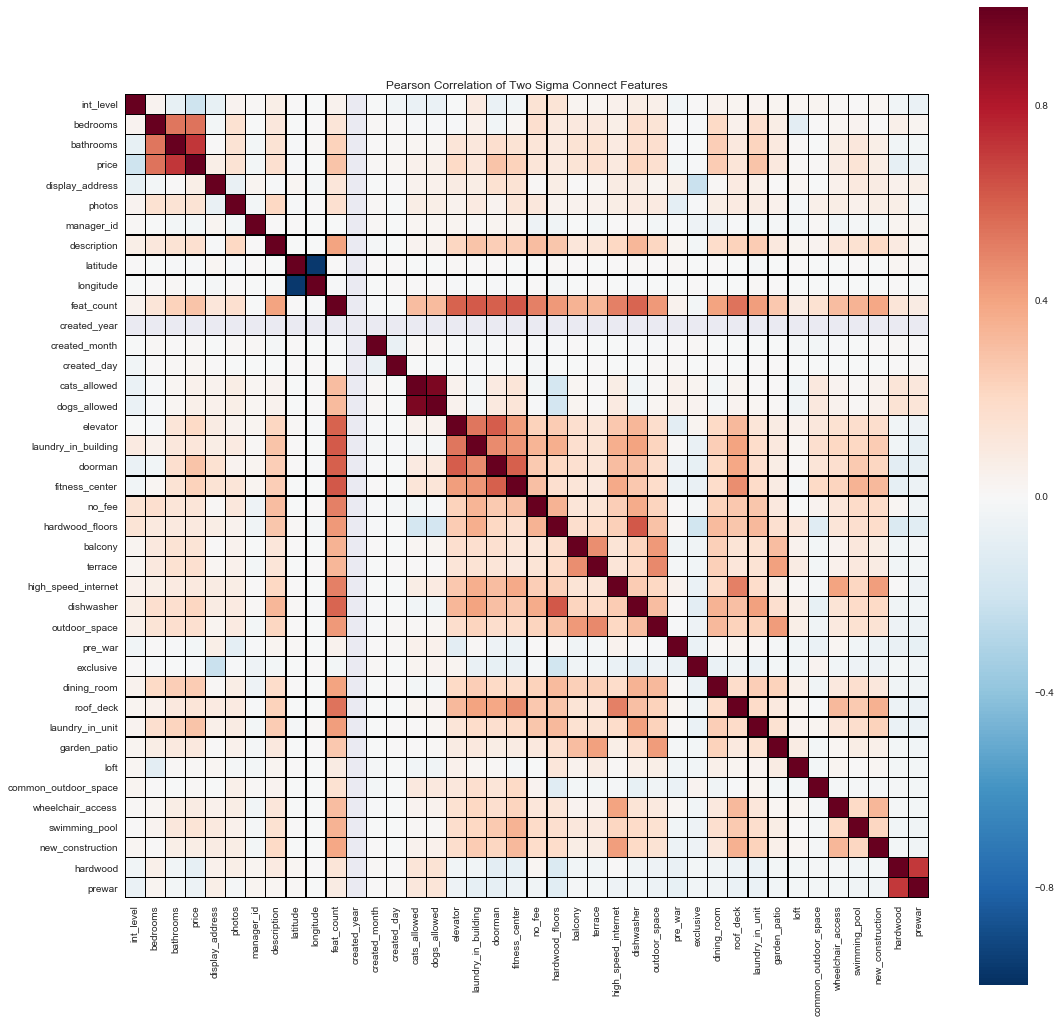

In [172]:
#Creating a coorelation matrix just to see how the features are correlated
plt.figure(figsize=(18, 18))
plt.title('Pearson Correlation of Two Sigma Connect Features')
# Draw the heatmap using seaborn
sns.heatmap(resulta.corr(), linewidths=0.25, vmax=1.0, square=True , linecolor='black')

### Using RBF Kernel in SVM

In [207]:
#We will be implementing the SVM with RBF kernel since there are non linear relationships in our data
svmrbf = svm.SVC(class_weight='balanced')

In [208]:
svmrbf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [209]:
ypred1=svmrbf.predict(X_test)

### Confusion Matrix for SVM with RBF kernel

In [210]:
print (metrics.confusion_matrix(y_test, ypred1))
print (metrics.classification_report(y_test, ypred1))

[[10101   167]
 [ 4166   372]]
             precision    recall  f1-score   support

        0.0       0.71      0.98      0.82     10268
        1.0       0.69      0.08      0.15      4538

avg / total       0.70      0.71      0.62     14806



#### We get  f1 score of 62% with SVM mdel.  The model correctly identifies 10101 lows as low and incorrectly identifies 167 lows as high.

#### The model incorrectly indentifies 4166 highs as lows and correctly indentifies 372 highs as highs

### Implementing XGBoost Model

In [312]:
import xgboost as xgb

In [313]:
from xgboost import XGBClassifier

#### We want to find out the optimum values for max_depth and min_child_weight. Max_depth is the maximum depth of the tree and is used to control overfitting. min_child_weight is the minimum sum of weights of all observations

In [377]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [378]:
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82651, std: 0.00564, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.82626, std: 0.00602, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.82627, std: 0.00571, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.84334, std: 0.00452, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.84363, std: 0.00433, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.84284, std: 0.00457, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.84846, std: 0.00407, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.84841, std: 0.00482, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.84806, std: 0.00439, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.84752, std: 0.00462, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.84831, std: 0.00435, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.84861, std: 0.00433, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 9, 'min_child_weight': 5

In [383]:
param_test2 = {
 'max_depth':[8,9,10],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84866, std: 0.00441, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.84842, std: 0.00400, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: 0.84853, std: 0.00382, params: {'max_depth': 8, 'min_child_weight': 6},
  mean: 0.84864, std: 0.00427, params: {'max_depth': 9, 'min_child_weight': 4},
  mean: 0.84861, std: 0.00433, params: {'max_depth': 9, 'min_child_weight': 5},
  mean: 0.84877, std: 0.00372, params: {'max_depth': 9, 'min_child_weight': 6},
  mean: 0.84753, std: 0.00584, params: {'max_depth': 10, 'min_child_weight': 4},
  mean: 0.84780, std: 0.00395, params: {'max_depth': 10, 'min_child_weight': 5},
  mean: 0.84834, std: 0.00488, params: {'max_depth': 10, 'min_child_weight': 6}],
 {'max_depth': 9, 'min_child_weight': 6},
 0.84877433795270907)

#### The gridsearch gives a min_child_weight of 5 and max_depth of 9 on the first try, We then take values one below and one above the suggessted values and get 9 and 6 as the optimum values

In [389]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=4,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_train,y_train)
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84016, std: 0.00562, params: {'reg_alpha': 0},
  mean: 0.84002, std: 0.00572, params: {'reg_alpha': 0.001},
  mean: 0.83977, std: 0.00562, params: {'reg_alpha': 0.005},
  mean: 0.84021, std: 0.00549, params: {'reg_alpha': 0.01},
  mean: 0.84065, std: 0.00516, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.05},
 0.84065138000568207)

#### We find that a reg_alpha value of 0.05 is the optimum value. A reg_alpha value is used to handle regularization 

In [399]:
XGB = xgb.XGBClassifier(silent=False,min_child_weight=6,max_depth=9,max_delta_step=10,reg_alpha=0.05)

In [400]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=10, max_depth=9,
       min_child_weight=6, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0.05, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [401]:
ypred3 = XGB.predict(X_test)

### Confusion Matrix for XGBoost

In [402]:
print (metrics.confusion_matrix(y_test, ypred3))
print (metrics.classification_report(y_test, ypred3))

[[9212 1056]
 [2009 2529]]
             precision    recall  f1-score   support

        0.0       0.82      0.90      0.86     10268
        1.0       0.71      0.56      0.62      4538

avg / total       0.79      0.79      0.79     14806



#### The XGBoost gives the best f1 score of 79% after tuning. The model correctly  indentifies 9212 lows as lows and incorrectly indentifies 1056 lows as high.

#### The model incorrectly identifies 2009 highs as low and correctly indentifies 2529 highs as high.

#### By comparing the three models that have been implemneted, By looking at the confusion matrix, we find that Xtreme Gradient boosting gives the best results with a precision of 79%, recall of 79% and f1 score of 79%